## Cau 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\DS102\Thực hành\lab_1\data_preprocessing.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [11]:
# Hàm chuẩn hóa data
for col in df.columns:
    if df[col].dtype == 'float64' and col != 'area':
        df[col] = (df[col] - df[col].mean()) / df[col].std()

df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.0
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.0
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.0
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.0
4,8,6,3,8,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.0


### Model

In [12]:
class LinearRegression:
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        return np.square(delta).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = np.matmul(X.T, X)
        inv_cov = np.linalg.inv(cov)
        self.theta_ = inv_cov @ (X.T @ y)  # Chỉ tính inv_cov bên trong, không cần tham số inv_cov

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred

In [13]:
X_y = df.to_numpy()

In [14]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections= [int(0.8*N)])

In [15]:
X_y_train

array([[ 7.        ,  5.        ,  3.        , ...,  1.49716438,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        , 10.        , ..., -1.74007034,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        , 10.        , ..., -1.51681277,
        -0.07319742,  0.        ],
       ...,
       [ 6.        ,  3.        ,  2.        , ..., -0.73541129,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        ,  2.        , ...,  3.00415295,
        -0.07319742,  4.62      ],
       [ 9.        ,  4.        ,  7.        , ...,  0.26924776,
        -0.07319742,  1.63      ]])

In [16]:
X_y_test

array([[ 7.00000000e+00,  5.00000000e+00,  8.00000000e+00, ...,
        -2.33081763e-01, -7.31974162e-02,  0.00000000e+00],
       [ 5.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 8.00000000e+00,  6.00000000e+00,  8.00000000e+00, ...,
         4.92505328e-01, -7.31974162e-02,  7.46280000e+02],
       ...,
       [ 7.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  1.11600000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  1.10000000e+01, ...,
         2.69247762e-01, -7.31974162e-02,  0.00000000e+00]])

In [17]:
X_train = X_y_train[:,:12]
y_train = X_y_train[:,12:]

X_test = X_y_test[:,:12]
y_test = X_y_test[:,12:]

In [18]:
lr = LinearRegression()
lr.fit( X_test, y_test)

In [19]:
y_pred = lr.predict(X_test)
y_pred

array([[ 38.88561613,  18.11021942,  61.96554042,  38.25122208,
         27.14489219,  17.71694399,   9.79402384,  64.08445505,
         40.42658577,  60.57625344, -23.30826149,  46.60635238,
         -6.18670638,  27.36594865,  27.0473637 ,  26.40105783,
         11.06719404,  34.63996632,   0.1275179 ,  62.88292586,
         -1.40295453,   7.37951905, -10.86288733,  48.5588177 ,
          7.77967795,   6.64802356, -39.82383482,   9.68681261,
         49.9189176 ,  10.91703105,  -3.04315205,  -3.22381774,
         -3.93949176,  -4.89347986,  12.00006879,  11.02222917,
         19.08235903,  32.17492158, -25.09029449,  34.00986315,
         10.71457058,  -1.90342467,  -1.77889143, -10.53782206,
          3.2530414 ,  28.20265487,  38.04554796,  -1.48430299,
         28.20265487,   0.94978799,  30.33101757,  25.13982606,
        -47.42381534,  31.29283736,   4.2310686 ,  10.09773298,
         36.25825006,  19.18478479,   8.94478013,  31.91665197,
         34.08933695,  21.27086574,  49.

In [20]:
lr.rmse(y_test, y_pred)

82.71227634414647

### Visualization

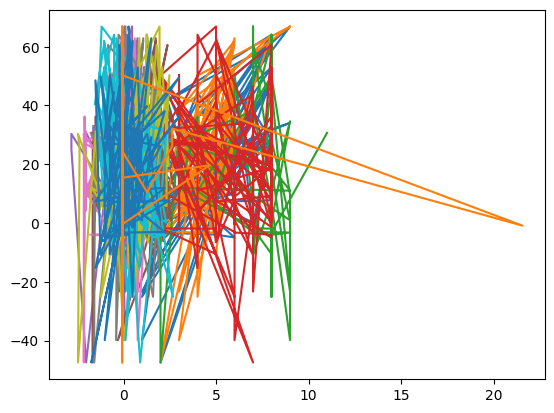

In [21]:
plt.plot(X_test, y_pred.T)